# **Laporan Penjualan Amazon**
Ikhtisar:
Kumpulan data ini menyediakan data penjualan terperinci dari Amazon, yang menawarkan tampilan komprehensif pada berbagai kategori produk dan kinerjanya dari waktu ke waktu. Ini mencakup informasi tentang angka penjualan, detail pesanan, kategori produk, dan demografi pelanggan.

Fitur:
1. ID Pesanan
Deskripsi: Pengidentifikasi unik untuk setiap pesanan yang dilakukan di Amazon. Kolom ini membantu melacak pesanan individual dan menautkan catatan terkait.

2. Tanggal
Deskripsi: Tanggal saat pesanan dilakukan. Kolom ini penting untuk menganalisis tren penjualan dari waktu ke waktu dan mengidentifikasi pola musiman.

3. Status
Deskripsi: Status pesanan saat ini (misalnya, Dikirim, Terkirim, Tertunda). Kolom ini memberikan wawasan tentang proses pemenuhan pesanan dan membantu memantau efisiensi pemrosesan pesanan.

4. Pemenuhan
Deskripsi: fulfillment dimulai dari penerimaan hingga pengiriman produk ke alamat penerima sesuai permintaan. Menunjukkan metode yang digunakan untuk memenuhi pesanan (misalnya, Dipenuhi oleh Amazon, Dipenuhi oleh Penjual). Fitur ini membantu dalam menganalisis kinerja berbagai metode pemenuhan dan dampaknya terhadap kepuasan pelanggan.

5. Saluran Penjualan
Deskripsi: Saluran tempat penjualan dilakukan (misalnya, Situs Web Amazon, Aplikasi Seluler). Kolom ini berguna untuk mengevaluasi efektivitas berbagai saluran penjualan dan memahami preferensi pelanggan.

6. Kategori
Deskripsi: Kategori produk tempat barang yang dibeli berada (misalnya, Elektronik, Pakaian, Barang Rumah Tangga). Fitur ini membantu dalam menganalisis kinerja penjualan di berbagai kategori produk.

7. Tingkat Layanan Pengiriman
Deskripsi: Tingkat layanan pengiriman yang dipilih untuk pesanan (misalnya, Pengiriman Standar, Pengiriman Dua Hari). Kolom ini membantu menilai dampak opsi pengiriman pada waktu pengiriman dan kepuasan pelanggan.

8. Ukuran
Deskripsi: Ukuran produk yang dipesan (misalnya, Kecil, Sedang, Besar). Fitur ini relevan untuk menganalisis kinerja penjualan berdasarkan ukuran produk dan memahami persyaratan inventaris.

9. Status Pengangkut
Deskripsi: Status pengiriman dengan pengangkut (misalnya, Dalam Perjalanan, Telah Dikirim, Dikembalikan). Kolom ini memberikan wawasan tentang proses pengiriman dan membantu dalam memantau kinerja pengiriman dan menangani pengembalian.

**Kasus Penggunaan:**

Analisis Penjualan:
Memeriksa tren penjualan dari waktu ke waktu, mengidentifikasi periode puncak, dan menganalisis kinerja berdasarkan kategori produk.

Wawasan Pelanggan:
Menjelajahi demografi pelanggan untuk memahami perilaku dan preferensi pembelian.

Manajemen Inventaris:
Menilai produk mana yang berkinerja baik dan mana yang tidak, membantu dalam manajemen inventaris dan rantai pasokan.

Strategi Pemasaran:
Mengembangkan kampanye pemasaran yang ditargetkan berdasarkan tren penjualan dan profil pelanggan.

**Sumber Data:**
Kumpulan data ini merupakan kumpulan simulasi data penjualan Amazon dan ditujukan untuk tujuan pendidikan dan analitis.

**Ucapan Terima Kasih:**
Kumpulan data ini dibuat untuk memfasilitasi proyek analisis data dan pembelajaran mesin. Ini ideal untuk mempraktikkan manipulasi data, analisis statistik, dan pemodelan prediktif.

In [1]:
import pandas as pd
df = pd.read_csv('Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# **Pembersihan Data**

kita hanya membutuhkan kolom:
1. Order ID
2. Date
3. Status
4. Fulfilment
5. Sales Chanell
6. Category
7. Ship Service Level
8. Size
9. Carrier Status
10. ship-state
11. ship-city
12. Ammount

Sisanya hapus : PendingS, New, fulfilled-by, B2B, ship-country, ship-postal-code, ship-state, ship-city, Ammount, Currency,

In [2]:
df = df.drop(['PendingS', 'New', 'fulfilled-by', 'B2B', 'ship-country', 'ship-postal-code', 'currency'], axis=1)

In [3]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [4]:
# ganti nilai yang hilang kolom amount dengan nilai rata berdasarkan jenis kategori dan ukuran.
import pandas as pd

average_prices = df.groupby(['Category', 'Size'])['Amount'].mean().reset_index()

for index, row in df.iterrows():
  if pd.isna(row['Amount']):
    category = row['Category']
    size = row['Size']
    average_price = average_prices[(average_prices['Category'] == category) & (average_prices['Size'] == size)]['Amount'].values[0]
    df.at[index, 'Amount'] = average_price


In [5]:
# Create a program to replace missing values ​​in the ship-city column with "not knowing"

df['ship-city'].fillna('not knowing', inplace=True)
df['ship-state'].fillna('not knowing', inplace=True)

In [6]:
# ubah isi dari kolom state dan city menjadi besar semua.
df['ship-state'] = df['ship-state'].str.upper()
df['ship-city'] = df['ship-city'].str.upper()

In [7]:
df['ship-city'].nunique()

7292

In [8]:
df.duplicated().sum()

168

Order ID tidak mungkin mengalami duplicated, maka dari itu kita hapus data yang duplicated.

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,index,Qty,Amount
count,128808.000000,128808.000000,128808.000000
mean,64564.582906,0.904416,648.697101
std,37193.614079,0.313373,276.307597
min,0.000000,0.000000,0.000000
25%,32368.750000,1.000000,447.245676
50%,64570.500000,1.000000,612.000000
75%,96772.250000,1.000000,788.000000
max,128974.000000,15.000000,5584.000000


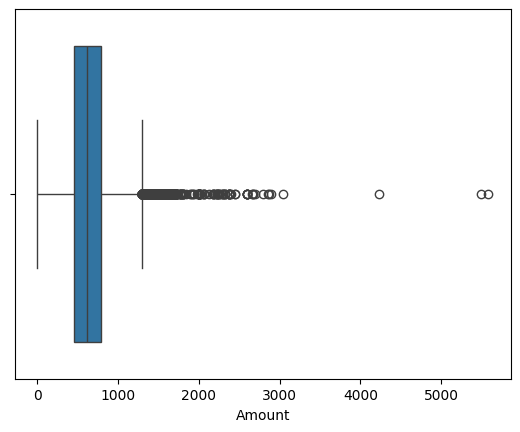

In [11]:
# prompt: create a boxplot to identify normalization Qty

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Amount'])
plt.show()


In [12]:
# prompt: make a program for normalize colomn amount with MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


In [13]:
df.dtypes

,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object


In [14]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-14-5308818f04c8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [15]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [16]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,0.115978,MUMBAI,MAHARASHTRA
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,0.072708,BENGALURU,KARNATAKA
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,0.058918,NAVI MUMBAI,MAHARASHTRA
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,0.134909,PUDUCHERRY,PUDUCHERRY
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,0.102794,CHENNAI,TAMIL NADU


# **Insight**

 Memeriksa tren penjualan dari waktu ke waktu, mengidentifikasi periode puncak, dan menganalisis kinerja berdasarkan kategori produk.

In [17]:
# prompt: date column time duration

df['Date'].min(), df['Date'].max()


(Timestamp('2022-03-31 00:00:00'), Timestamp('2022-06-29 00:00:00'))

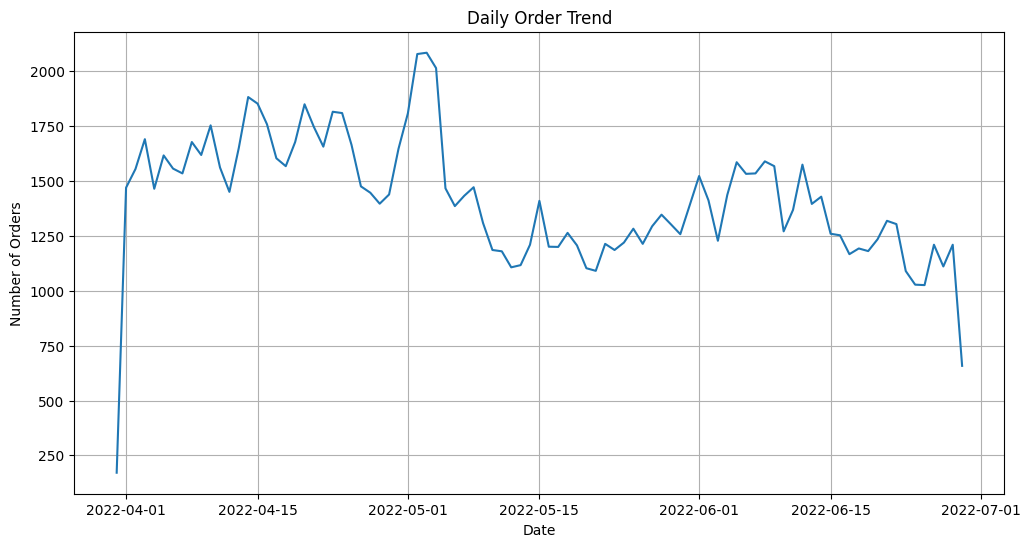

In [18]:
# prompt: make a line chart to calculate the quantity each time

import matplotlib.pyplot as plt
daily_orders = df.groupby('Date')['Order ID'].count()
plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values)
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Daily Order Trend')
plt.grid(True)
plt.show()


In [19]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Order ID'].count().reset_index(name='Total Qty')

print(monthly_sales)

   Year  Month  Total Qty
0  2022      3        171
1  2022      4      48900
2  2022      5      42040
3  2022      6      37697


1. Jumlah qty terbanyak pada bulan april dan may
2. pada tanggan 14-15 April dan 15 May terdapat trend pelonjakan pembeli. Pada april diperingati hari libur Mahavir Jayanti dan wafat isa almasih sedangkan 16 May Hari raya waisak.
3. setiap awal bulan terjadi trend kenaikan, untuk bulan may ada hari raya idul fitri, hal ini menjadikan pembelian terbanyak.

In [26]:
# prompt: create a program to view the total qty for each product category

category_sales = df.groupby('Category')['Order ID'].count().reset_index(name='Total Qty')
print(category_sales)


   Category  Total Qty
0   Blazzer      15489
1   Perfume       1157
2     Shirt      49804
3     Shoes        164
4     Socks        439
5   T-shirt      50219
6  Trousers      10607
7    Wallet        926
8     Watch          3


In [27]:
# prompt: create a program to create a new table, namely total revenue by multiplying Qty by amount

df['Total Revenue'] = df['Amount'] * df['Qty']

In [28]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,Month,Year,Total Revenue
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,0.115978,MUMBAI,MAHARASHTRA,4,2022,0.000000
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,0.072708,BENGALURU,KARNATAKA,4,2022,0.072708
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,0.058918,NAVI MUMBAI,MAHARASHTRA,4,2022,0.058918
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,0.134909,PUDUCHERRY,PUDUCHERRY,4,2022,0.000000
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,0.102794,CHENNAI,TAMIL NADU,4,2022,0.102794


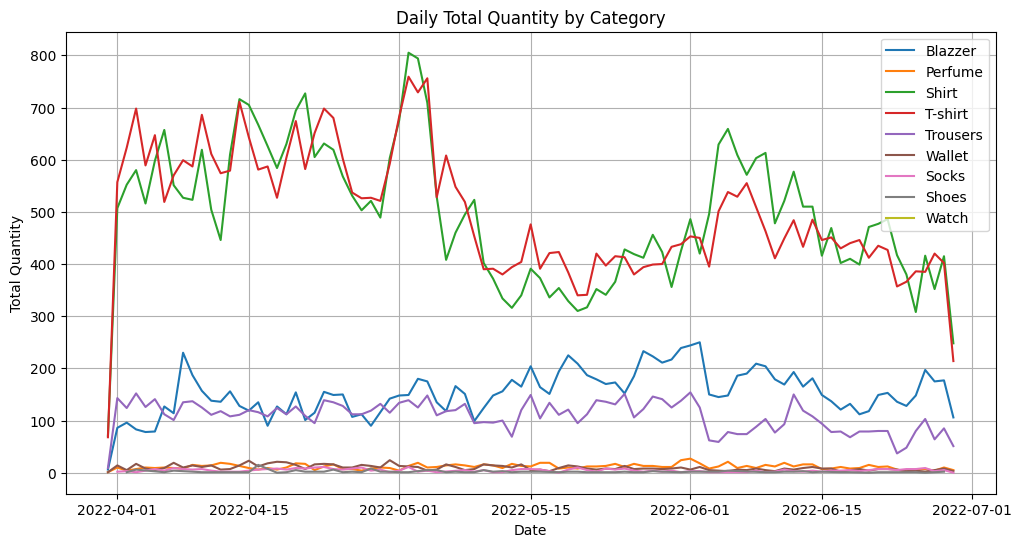

In [34]:
# prompt: Create a program for a line chart of the total quantity of each product category every day

import matplotlib.pyplot as plt
daily_category_sales = df.groupby(['Date', 'Category'])['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
for category in daily_category_sales['Category'].unique():
  category_data = daily_category_sales[daily_category_sales['Category'] == category]
  plt.plot(category_data['Date'], category_data['Qty'], label=category)

plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Daily Total Quantity by Category')
plt.legend()
plt.grid(True)
plt.show()


Produk Shirt dan t-shirt adalah pembelian terbanyak, untuk total revenue T-shirt menjadi pemorelah revenue terbesar walaupun qty produk shirt dan t-shirt hampir sama.

# **Question 2**

Wawasan Pelanggan: Menjelajahi demografi pelanggan untuk memahami perilaku dan preferensi pembelian.

In [31]:
df['ship-state'] = df['ship-state'].replace({
    'NL': 'NAGALAND',
    'AR': 'ARUNACHAL PRADESH',
    'APO': 'ANDHRA PRADESH',
    'PB': 'PUNJAB',
    'RJ': 'RAJASTHAN',
    'PUNJAB/MOHALI/ZIRAKPUR': 'PUNJAB'
}).str.upper()


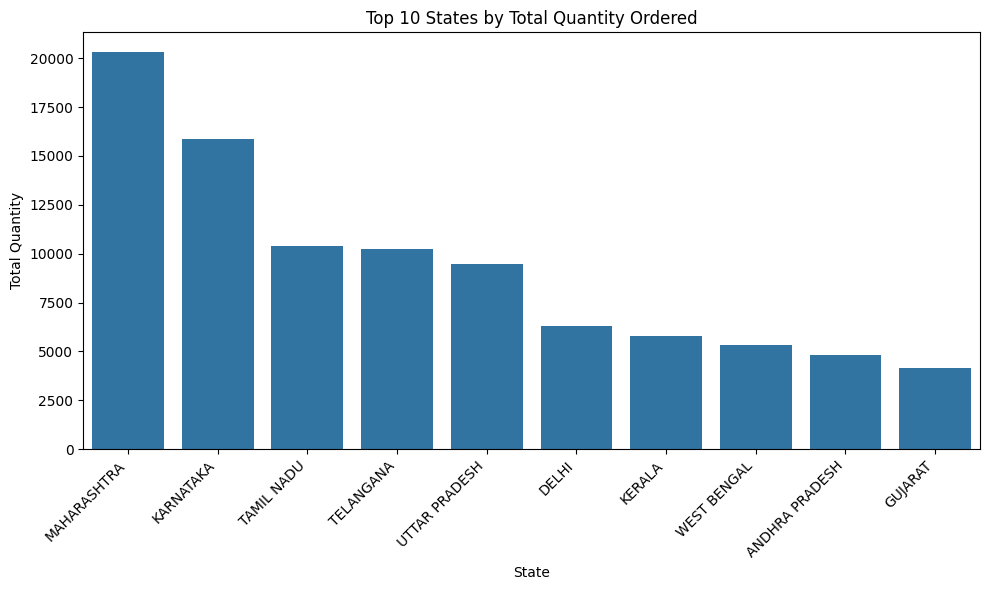

In [32]:
import matplotlib.pyplot as plt
state_qty = df.groupby('ship-state')['Qty'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ship-state', y='Qty', data=state_qty)
plt.xlabel('State')
plt.ylabel('Total Quantity')
plt.title('Top 10 States by Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


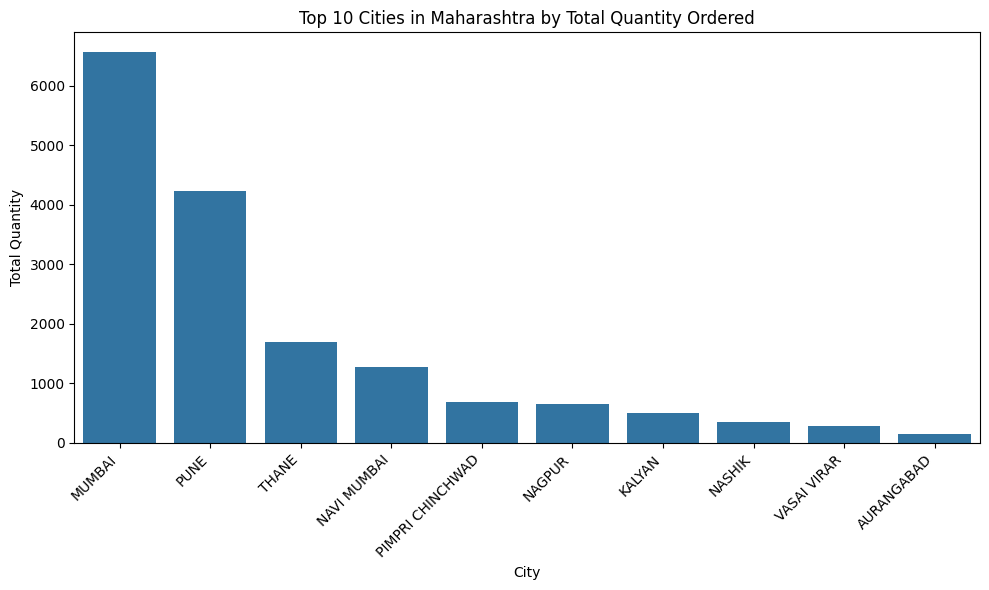

In [33]:
# prompt: create a program for bar chart top 10 in maharashtra state which city gets the most total qty

import matplotlib.pyplot as plt
maharashtra_city_qty = df[df['ship-state'] == 'MAHARASHTRA'].groupby('ship-city')['Qty'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ship-city', y='Qty', data=maharashtra_city_qty)
plt.xlabel('City')
plt.ylabel('Total Quantity')
plt.title('Top 10 Cities in Maharashtra by Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


State Maharashtra pembelian terbanyak dengan kota mumbai menyumbang peroleh total qty terbesar.

# **Question 3**

Menilai produk mana yang berkinerja baik dan mana yang tidak, membantu dalam manajemen inventaris dan rantai pasokan.

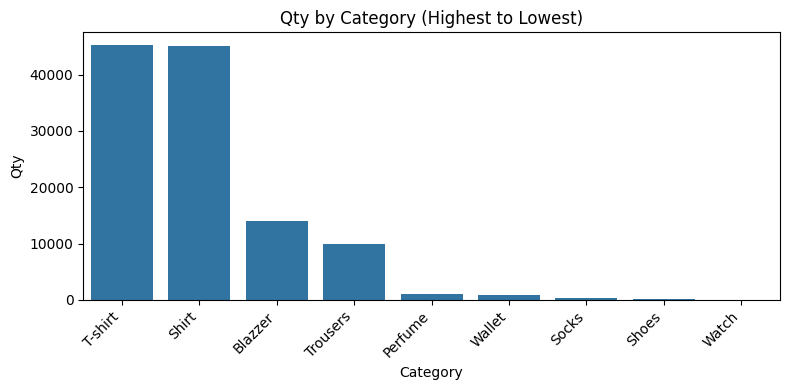

In [30]:
import matplotlib.pyplot as plt
category_revenue = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Category', y='Qty', data=category_revenue)
plt.xlabel('Category')
plt.ylabel('Qty')
plt.title('Qty by Category (Highest to Lowest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


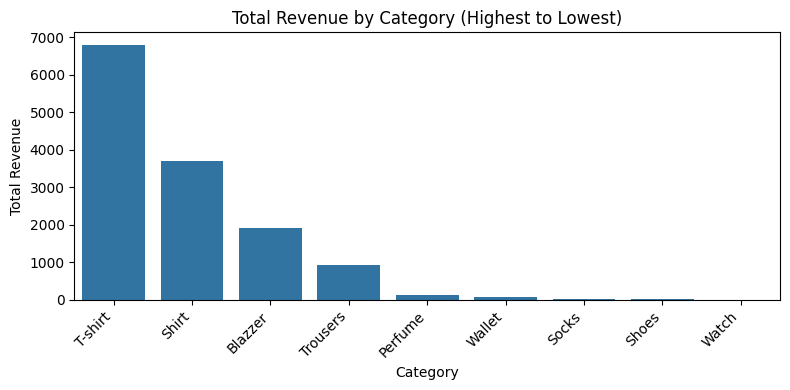

In [29]:
import matplotlib.pyplot as plt
category_revenue = df.groupby('Category')['Total Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Category', y='Total Revenue', data=category_revenue)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Category (Highest to Lowest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [35]:
product_qty = df.groupby(['Category', 'Size'])['Qty'].sum().reset_index(name='Total Qty')
print(product_qty)

    Category  Size  Total Qty
0    Blazzer   3XL       1758
1    Blazzer     L       2543
2    Blazzer     M       2325
3    Blazzer     S       1962
4    Blazzer    XL       2123
5    Blazzer    XS       1279
6    Blazzer   XXL       1944
7    Perfume  Free       1051
8      Shirt   3XL       5126
9      Shirt   4XL        352
10     Shirt   5XL        456
11     Shirt   6XL        616
12     Shirt     L       8036
13     Shirt     M       7701
14     Shirt     S       5154
15     Shirt    XL       7825
16     Shirt    XS       2778
17     Shirt   XXL       6934
18     Shoes  Free        152
19     Socks   3XL         60
20     Socks     L         67
21     Socks     M         50
22     Socks     S         67
23     Socks    XL         64
24     Socks    XS         26
25     Socks   XXL         64
26   T-shirt   3XL       5282
27   T-shirt   4XL         46
28   T-shirt   5XL         57
29   T-shirt   6XL         72
30   T-shirt     L       7388
31   T-shirt     M       8348
32   T-shi

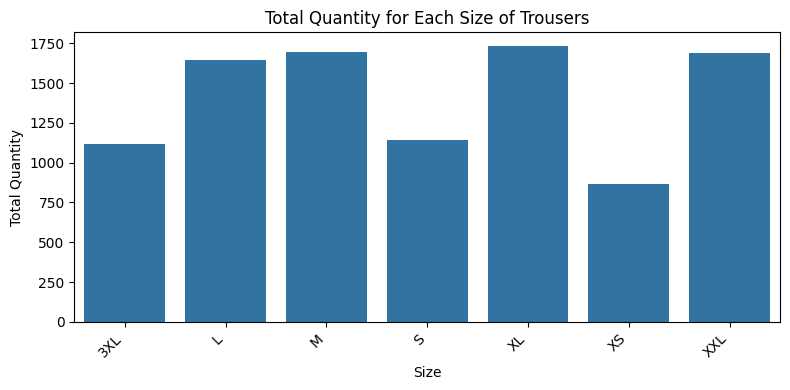

In [38]:
import matplotlib.pyplot as plt
trousers_sizes = product_qty[product_qty['Category'] == 'Trousers']

plt.figure(figsize=(8, 4))
sns.barplot(x='Size', y='Total Qty', data=trousers_sizes)
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.title('Total Quantity for Each Size of Trousers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

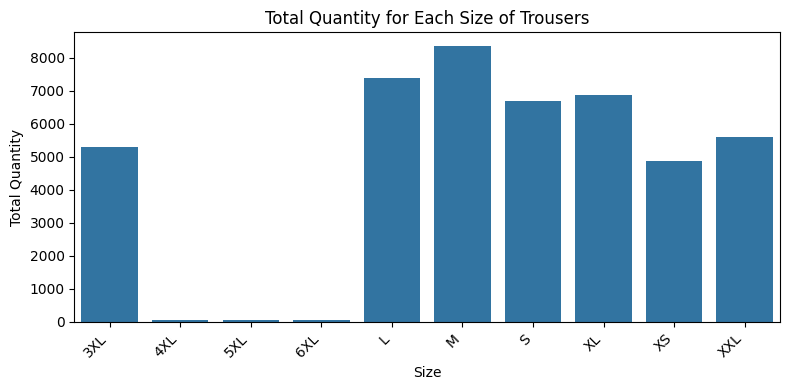

In [39]:
import matplotlib.pyplot as plt
trousers_sizes = product_qty[product_qty['Category'] == 'T-shirt']

plt.figure(figsize=(8, 4))
sns.barplot(x='Size', y='Total Qty', data=trousers_sizes)
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.title('Total Quantity for Each Size of Trousers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

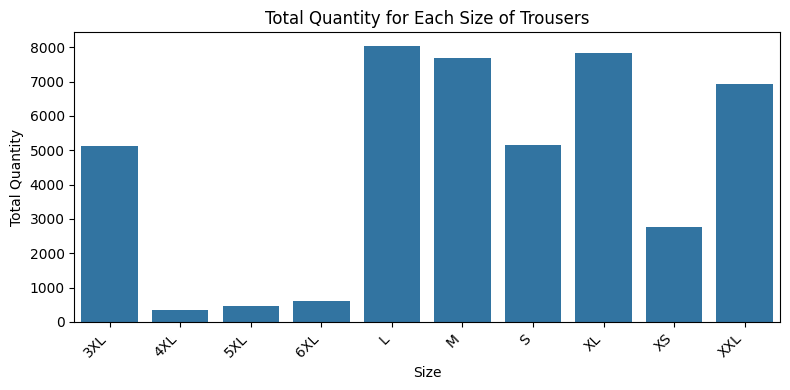

In [40]:
import matplotlib.pyplot as plt
trousers_sizes = product_qty[product_qty['Category'] == 'Shirt']

plt.figure(figsize=(8, 4))
sns.barplot(x='Size', y='Total Qty', data=trousers_sizes)
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.title('Total Quantity for Each Size of Trousers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

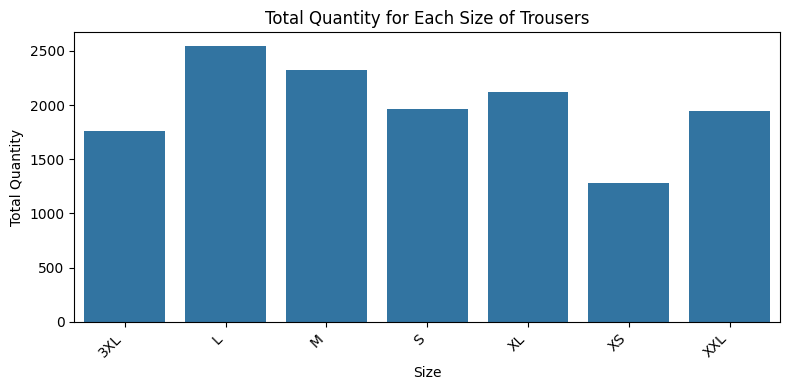

In [42]:
import matplotlib.pyplot as plt
trousers_sizes = product_qty[product_qty['Category'] == 'Blazzer']

plt.figure(figsize=(8, 4))
sns.barplot(x='Size', y='Total Qty', data=trousers_sizes)
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.title('Total Quantity for Each Size of Trousers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. T-Shirt, Shirt, Trousers, dan Blazzer merupakan produk yang berkinerja baik
2. Parfum, dompet, scock, shoes, dan watch merupakan produk yang berkinerja buruk
3. Size L, M, S, XL, XS, XXL, 3L sediakan stok untuk produk yang berkinerja baik.

In [43]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,Month,Year,Total Revenue
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,0.115978,MUMBAI,MAHARASHTRA,4,2022,0.000000
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,0.072708,BENGALURU,KARNATAKA,4,2022,0.072708
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,0.058918,NAVI MUMBAI,MAHARASHTRA,4,2022,0.058918
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,0.134909,PUDUCHERRY,PUDUCHERRY,4,2022,0.000000
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,0.102794,CHENNAI,TAMIL NADU,4,2022,0.102794


# **Question 4**

Strategi Pemasaran: Mengembangkan kampanye pemasaran yang ditargetkan berdasarkan tren penjualan dan profil pelanggan.

In [44]:
sales_channel_qty = df.groupby('Sales Channel')['Qty'].sum().reset_index()
print(sales_channel_qty)


  Sales Channel     Qty
0     Amazon.in  116329
1    Non-Amazon     167


In [46]:
sales_channel_qty = df.groupby('ship-service-level')['Qty'].sum().reset_index()
print(sales_channel_qty)

  ship-service-level    Qty
0          Expedited  82908
1           Standard  33588


In [57]:
sales_channel_qty = df.groupby('Fulfilment')['Qty'].sum().reset_index()
print(sales_channel_qty)

  Fulfilment    Qty
0     Amazon  78339
1   Merchant  30370


In [48]:
canceled_orders = df[df['Status'] == 'Cancelled'].groupby('Category')['Qty'].sum().reset_index()
print(canceled_orders)

   Category   Qty
0   Blazzer   525
1   Perfume    37
2     Shirt  2251
3     Shoes     5
4     Socks    14
5   T-shirt  2252
6  Trousers   535
7    Wallet    32


In [51]:
status_qty = df.groupby('Status')['Qty'].sum().reset_index()
print(status_qty)

                           Status    Qty
0                       Cancelled   5651
1                         Pending    657
2   Pending - Waiting for Pick Up    283
3                         Shipped  77918
4               Shipped - Damaged      1
5    Shipped - Delivered to Buyer  28831
6       Shipped - Lost in Transit      5
7      Shipped - Out for Delivery     35
8             Shipped - Picked Up    977
9     Shipped - Rejected by Buyer     11
10   Shipped - Returned to Seller   1969
11  Shipped - Returning to Seller    150
12                       Shipping      8


In [50]:
status_qty = df.groupby('Courier Status')['Qty'].sum().reset_index()
print(status_qty)

  Courier Status     Qty
0      Cancelled       0
1     On the Way       0
2        Shipped  109749
3      Unshipped    6747


In [52]:
cancelled_by_courier = df[df['Status'] == 'Cancelled'].groupby('Courier Status')['Qty'].sum().reset_index()
print(cancelled_by_courier)

  Courier Status   Qty
0      Cancelled     0
1     On the Way     0
2      Unshipped  5651


In [53]:
df = df[~df['Status'].isin(['Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Lost in Transit', 'Shipped - Damaged', 'Cancelled'])]


In [55]:
df.shape

(108383, 17)

**Kampanye**
1. Fokus kampanye untuk produk T-shirt dan Shirt, pada hari-hari raya dan awal bulan.
2. Lakukan promo dan diskon harga untuk meningkatkan trend penjualan.

**Daerah**
1. Maharashtra dengan kota Mumbai merupakan daerah yang jumlah pembeliannya terbanyak. Karena kota mumbai sebagai kota yang terkaya di India.
2. Pada saat hari raya agama lakukan kampanye pada daerah yang banyak penduduk agama tersebut. Seperti Islam di daerah Uttar Pradesh, Bihar, West Bengal, Assam, and Kerala. Kristen di daerah Uttar Pradesh, Bihar, West Bengal, Assam, and Kerala.

**Target Kampanye**
1. orang beragama di India

**Produk**
1. Sediakan produk T-shirt, Shirt, Blazzer, dan Trousser dengan jumlah lebih untuk menanggapi permintaan pembelian.
2. Lakukan pencatan terbaru, komunikasikan dengan inventaris.
3. Perluas model pakaian dengan tren lokal dan kesukaan warga lokal.